# Housing Price Data Analysis
## Comprehensive Exploratory Data Analysis and Machine Learning with Model Interpretability

This notebook provides a detailed analysis of housing price data, including:
- Exploratory Data Analysis (EDA)
- Data preprocessing and feature engineering
- Machine learning model development
- Model evaluation and interpretation
- **SHAP and LIME interpretability analysis**
- Key findings and insights

In [ ]:
%pip install lime
%pip install dash dash-bootstrap-components

print("LIME and dash libraries installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0528f21b593d0b166b4c4413afe9f1154ae9a9f97b63b4ebeceb734194fa1436
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 8.4 MB/s eta 0:00:00
LIME and dash libraries installed successfully!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model Interpretability libraries
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer

# Interactive Dashboard libraries for SHAP visualizations
import plotly.graph_objs as go
from dash import Dash, dcc, html, Input, Output, callback
import dash_bootstrap_components as dbc
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Set style for better visualizations
plt.style.use('default')
sns.set_palette('husl')

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")
print(f"SHAP version: {shap.__version__}")

Libraries imported successfully!
SHAP version: 0.48.0


## 1. Data Loading and Initial Exploration

In [ ]:
# Load the housing dataset
#URL= https://www.kaggle.com/datasets/saurabhbadole/housing-price-data
#df = pd.read_csv('../Housing_Price_Data.csv')
df = pd.read_csv('/content/drive/MyDrive/Data Viz/Housing_Price_Data.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())

# Display first few rows
print("\nFirst 5 rows:")
display(df.head())

# Data types
print("\nData types:")
print(df.dtypes)

Dataset shape: (545, 13)

Column names:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

First 5 rows:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Data types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [ ]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\n" + "="*50)
print("Missing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
if missing_df['Missing Count'].sum() > 0:
    display(missing_df[missing_df['Missing Count'] > 0])
else:
    print("No missing values found!")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Missing Values:
No missing values found!


In [ ]:
#Checking for duplicates
duplicates = df[df.duplicated()]

amount_of_duplicates = len(duplicates)

print(f"Amount of duplicates: {amount_of_duplicates}")

Amount of duplicates: 0


In [ ]:
# Statistical summary
print("Statistical Summary for Numeric Columns:")
display(df.describe())

print("\nCategorical Variables Summary:")
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                   'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())

Statistical Summary for Numeric Columns:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000



Categorical Variables Summary:

mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64

guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64

basement:
basement
no     354
yes    191
Name: count, dtype: int64

hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64

prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64

furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


## 2. Exploratory Data Analysis (EDA)

### 2.1 Target Variable Analysis

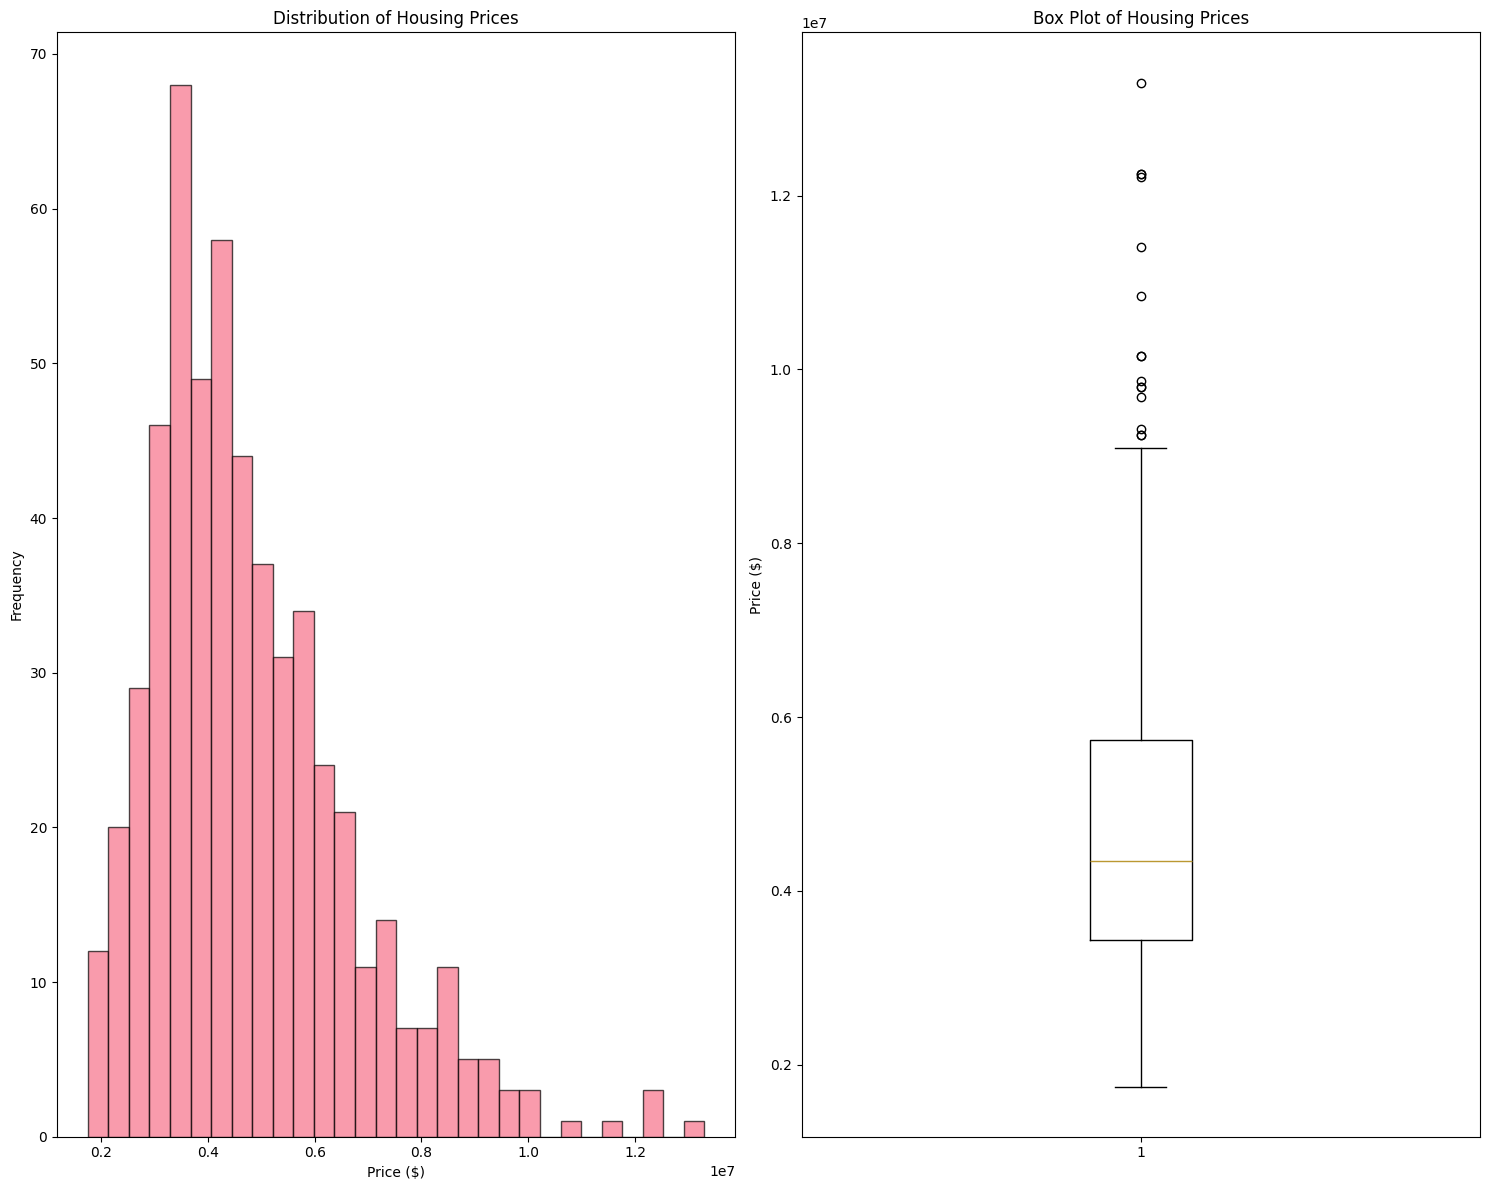

Price Statistics:
Mean: $4,766,729.25
Median: $4,340,000.00
Standard Deviation: $1,870,439.62
Min: $1,750,000.00
Max: $13,300,000.00


In [ ]:
# Analysis of the target variable (price)
fig, axes = plt.subplots(1, 2, figsize=(15, 12))

# Histogram
axes[0].hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Housing Prices')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(df['price'])
axes[1].set_title('Box Plot of Housing Prices')
axes[1].set_ylabel('Price ($)')



plt.tight_layout()
plt.show()

# Price statistics
print(f"Price Statistics:")
print(f"Mean: ${df['price'].mean():,.2f}")
print(f"Median: ${df['price'].median():,.2f}")
print(f"Standard Deviation: ${df['price'].std():,.2f}")
print(f"Min: ${df['price'].min():,.2f}")
print(f"Max: ${df['price'].max():,.2f}")

### 2.2 Categorical Variables Analysis

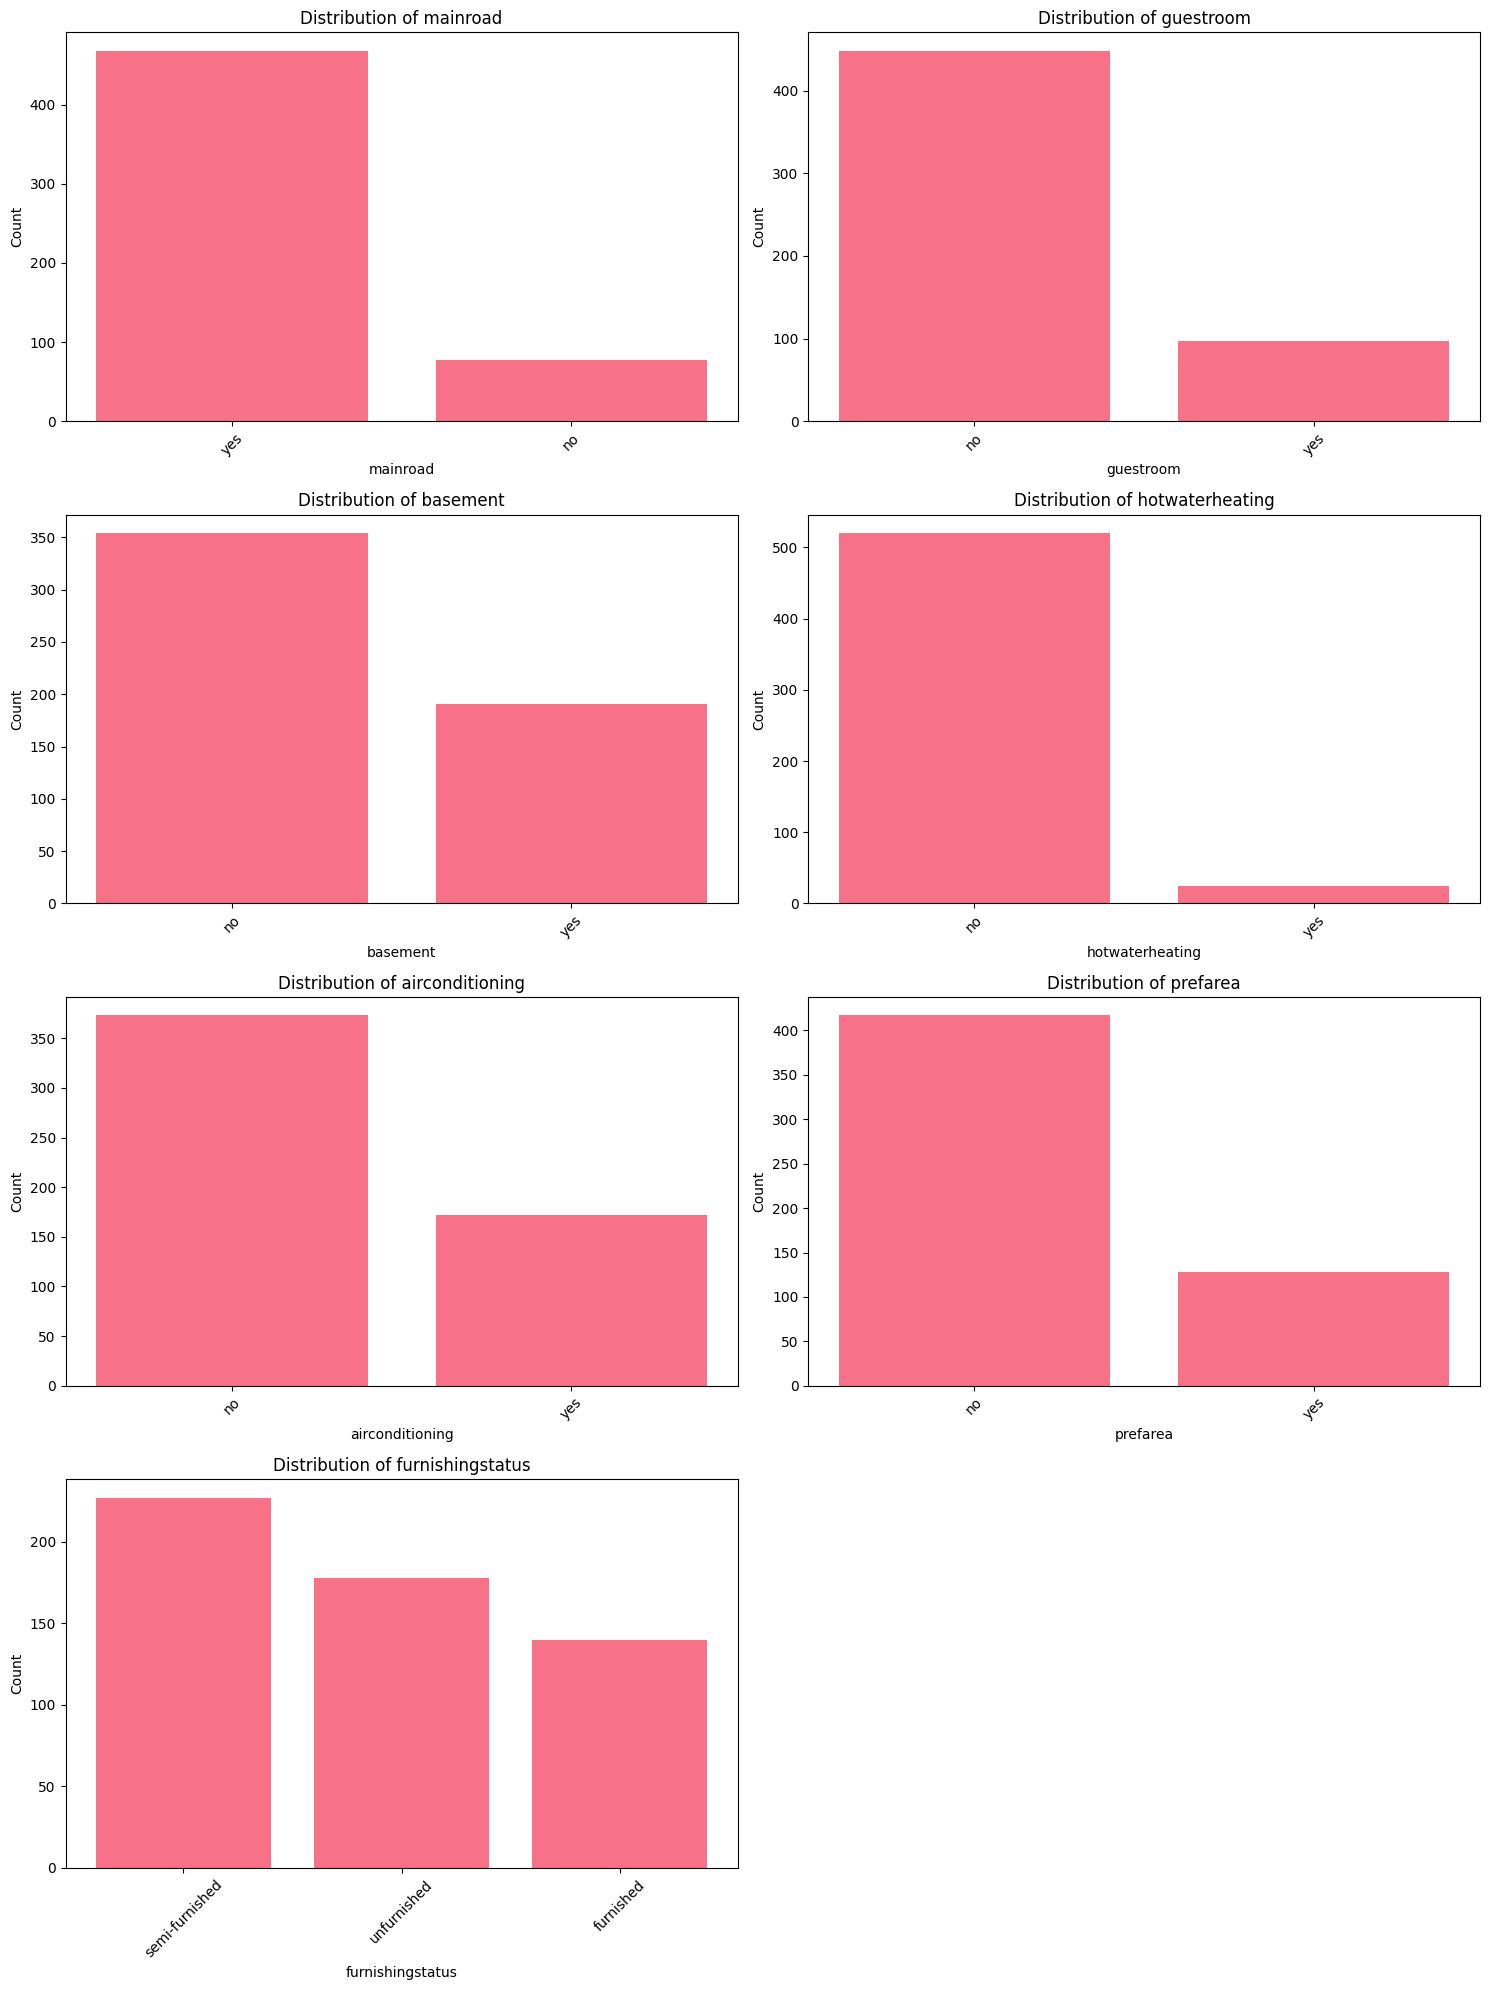

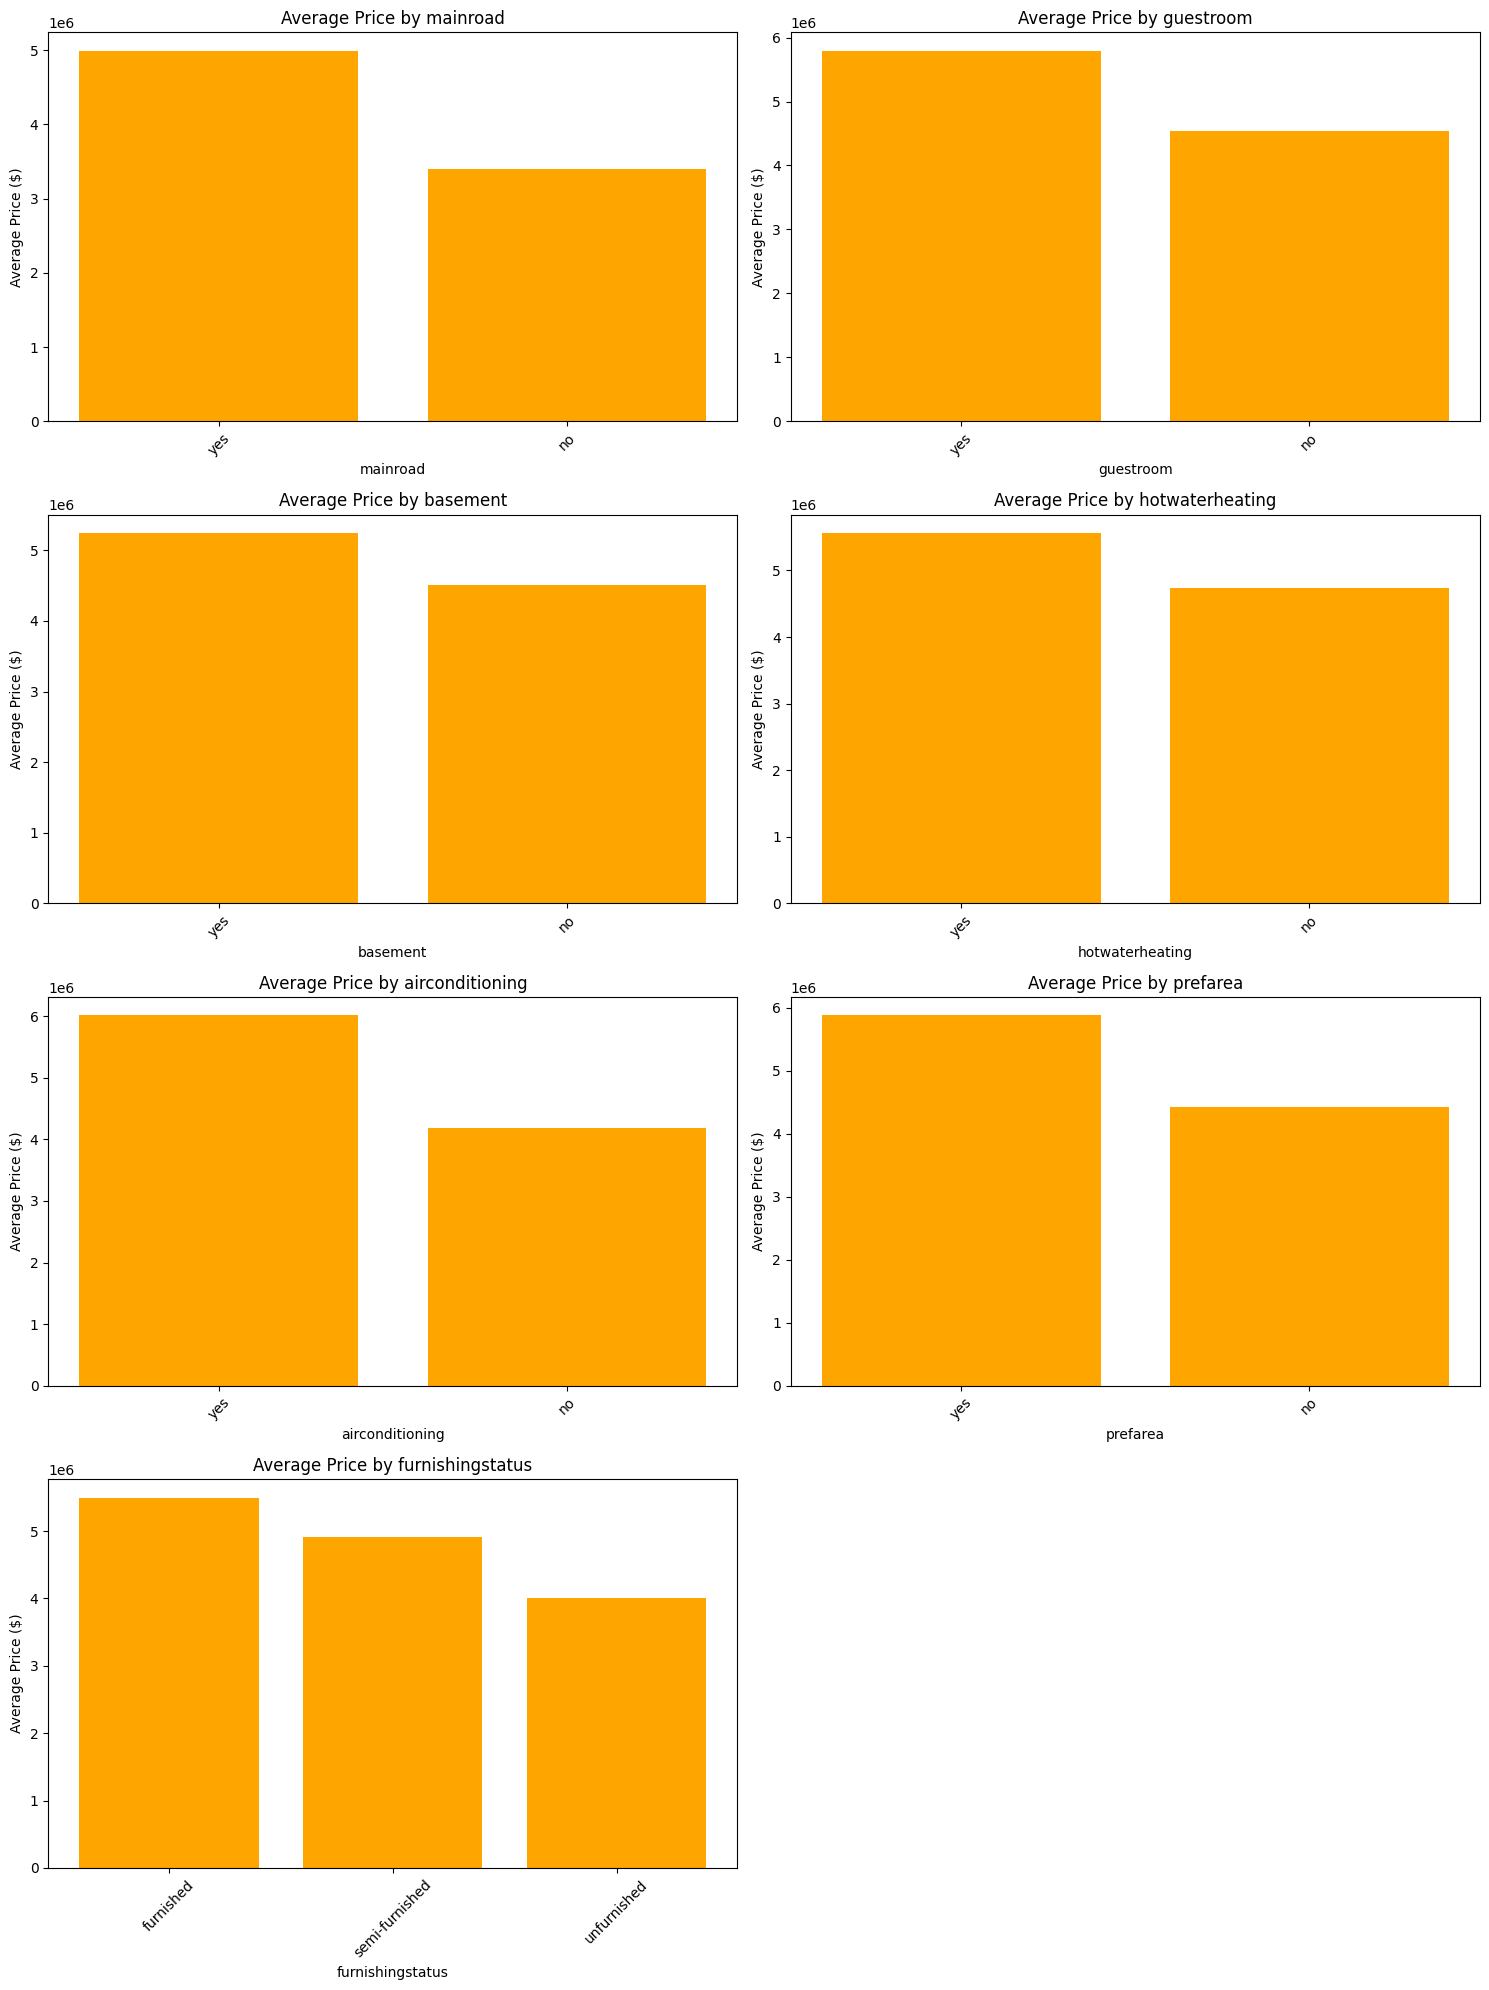


mainroad Analysis:
mainroad
yes    468
no      77
Name: count, dtype: int64

Average price by mainroad:


,mean,median,count
mainroad,,,
no,3398904.55,3290000.0,77
yes,4991777.33,4550000.0,468



guestroom Analysis:
guestroom
no     448
yes     97
Name: count, dtype: int64

Average price by guestroom:


,mean,median,count
guestroom,,,
no,4544545.62,4165000.0,448
yes,5792896.91,5495000.0,97



basement Analysis:
basement
no     354
yes    191
Name: count, dtype: int64

Average price by basement:


,mean,median,count
basement,,,
no,4509965.93,4077500.0,354
yes,5242615.18,4900000.0,191



hotwaterheating Analysis:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Average price by hotwaterheating:


,mean,median,count
hotwaterheating,,,
no,4728593.15,4329500.0,520
yes,5559960.00,5383000.0,25



airconditioning Analysis:
airconditioning
no     373
yes    172
Name: count, dtype: int64

Average price by airconditioning:


,mean,median,count
airconditioning,,,
no,4191939.68,3885000.0,373
yes,6013220.58,5757500.0,172



prefarea Analysis:
prefarea
no     417
yes    128
Name: count, dtype: int64

Average price by prefarea:


,mean,median,count
prefarea,,,
no,4425298.78,4095000.0,417
yes,5879045.70,5582500.0,128



furnishingstatus Analysis:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

Average price by furnishingstatus:


,mean,median,count
furnishingstatus,,,
furnished,5495696.00,5075000.0,140
semi-furnished,4907524.23,4585000.0,227
unfurnished,4013831.46,3430000.0,178


In [ ]:
# Analyze categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                   'airconditioning', 'prefarea', 'furnishingstatus']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        # Count plot
        value_counts = df[col].value_counts()
        axes[i].bar(value_counts.index, value_counts.values)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplot
if len(categorical_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Price analysis by categorical variables
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        # Average price by category
        price_by_category = df.groupby(col)['price'].mean().sort_values(ascending=False)
        axes[i].bar(price_by_category.index, price_by_category.values, color='orange')
        axes[i].set_title(f'Average Price by {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Average Price ($)')
        axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplot
if len(categorical_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Print detailed statistics for each categorical variable
for col in categorical_cols:
    print(f"\n{col} Analysis:")
    print(df[col].value_counts())
    print(f"\nAverage price by {col}:")
    display(df.groupby(col)['price'].agg(['mean', 'median', 'count']).round(2))

### 2.3 Numeric Variables Analysis

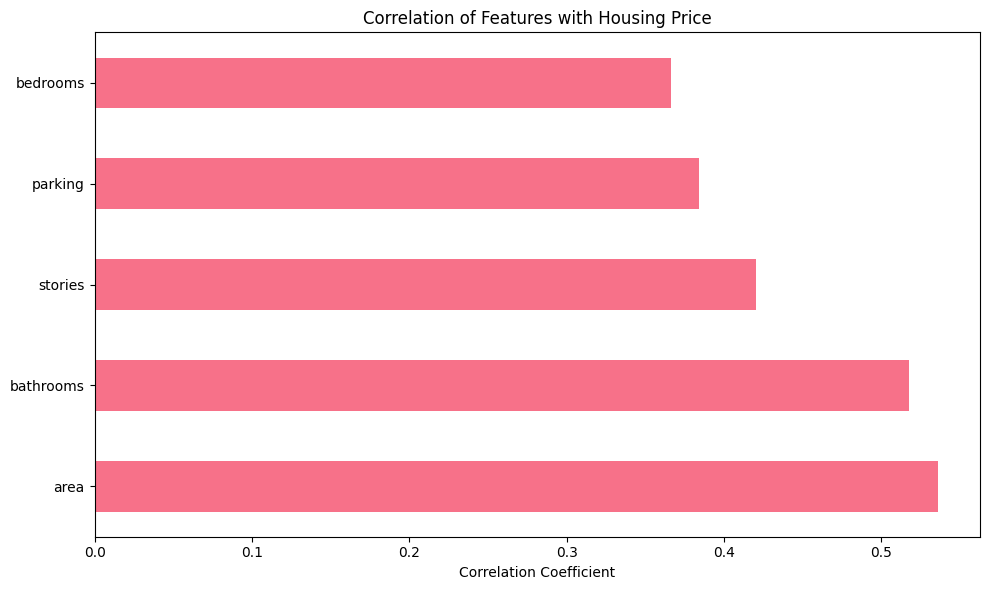

Correlations with Price:
area: 0.536
bathrooms: 0.518
stories: 0.421
parking: 0.384
bedrooms: 0.366


In [ ]:
# Analyze numeric variables
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Correlation with price
correlations = df[numeric_cols + ['price']].corr()['price'].drop('price').sort_values(ascending=False)

# Plot correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='barh')
plt.title('Correlation of Features with Housing Price')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

print("Correlations with Price:")
for feature, corr in correlations.items():
    print(f"{feature}: {corr:.3f}")

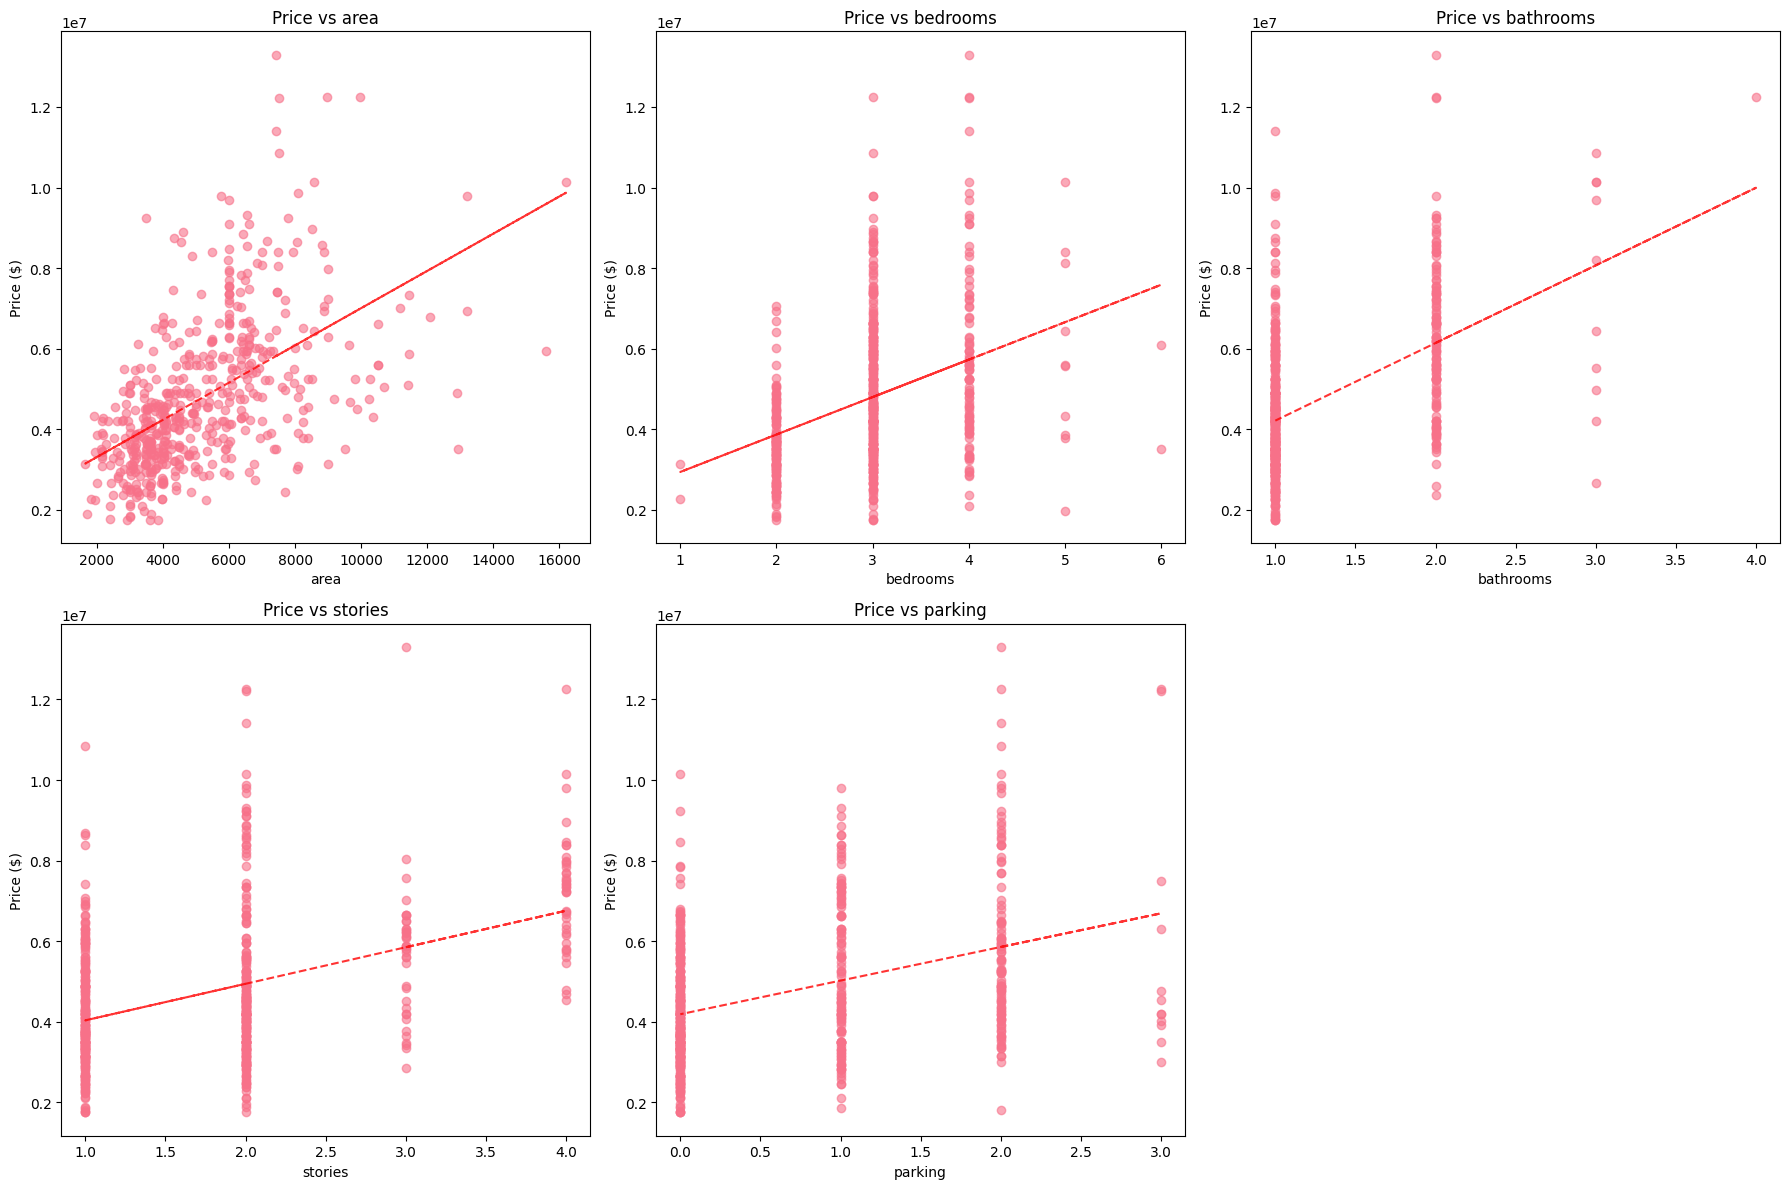

In [ ]:
# Scatter plots of numeric features vs Price
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numeric_cols):
    axes[i].scatter(df[feature], df['price'], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price ($)')
    axes[i].set_title(f'Price vs {feature}')

    # Add trend line
    z = np.polyfit(df[feature].dropna(), df.loc[df[feature].notna(), 'price'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

# Remove empty subplot
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### 2.4 Correlation Matrix and Heatmap

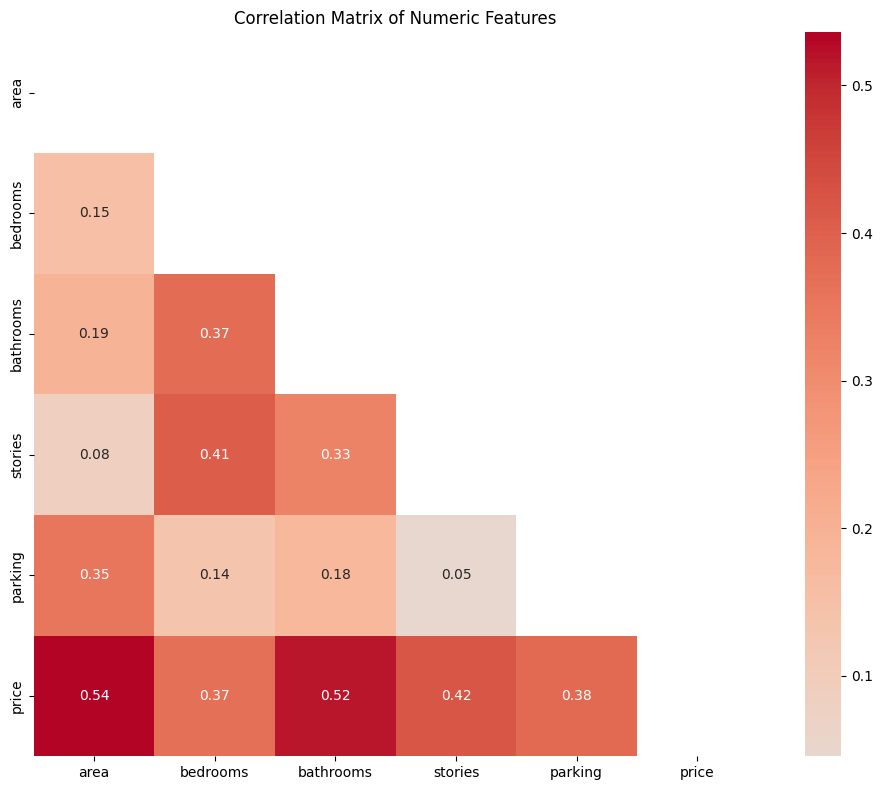


No highly correlated feature pairs found.


In [ ]:
# Create correlation matrix for all numeric variables
correlation_matrix = df[numeric_cols + ['price']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # High correlation threshold
            high_corr_pairs.append((correlation_matrix.columns[i],
                                  correlation_matrix.columns[j],
                                  corr_val))

if high_corr_pairs:
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    for feature1, feature2, corr in high_corr_pairs:
        print(f"{feature1} - {feature2}: {corr:.3f}")
else:
    print("\nNo highly correlated feature pairs found.")

## 3. Data Preprocessing and Feature Engineering

In [ ]:
# Create a copy for preprocessing
df_processed = df.copy()

# Encode categorical variables
# Map yes/no to 1/0 for binary categorical variables
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})

# One-hot encode furnishingstatus
furnishing_dummies = pd.get_dummies(df_processed['furnishingstatus'], prefix='furnishing')
df_processed = pd.concat([df_processed, furnishing_dummies], axis=1)
df_processed.drop('furnishingstatus', axis=1, inplace=True)

print("Categorical variables encoded successfully!")
print(f"\nProcessed dataset shape: {df_processed.shape}")
print(f"\nNew columns: {df_processed.columns.tolist()}")

# Check for missing values
print(f"\nMissing values: {df_processed.isnull().sum().sum()}")

Categorical variables encoded successfully!

Processed dataset shape: (545, 15)

New columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishing_furnished', 'furnishing_semi-furnished', 'furnishing_unfurnished']

Missing values: 0


## 4. Machine Learning Model Development

In [ ]:
# Prepare features and target
X = df_processed.drop('price', axis=1)
y = df_processed['price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Features shape: (545, 14)
Target shape: (545,)

Feature columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishing_furnished', 'furnishing_semi-furnished', 'furnishing_unfurnished']

Training set size: (436, 14)
Test set size: (109, 14)


In [ ]:
# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42,),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)

    results[name] = {
        'model': model,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_rmse': np.sqrt(train_mse),
        'test_rmse': np.sqrt(test_mse),
        'test_predictions': test_pred
    }

    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Test RMSE: ${np.sqrt(test_mse):,.2f}")


Training Linear Regression...
  Train R²: 0.6859
  Test R²: 0.6529
  Test RMSE: $1,324,506.96

Training Ridge Regression...
  Train R²: 0.6859
  Test R²: 0.6524
  Test RMSE: $1,325,455.14

Training Random Forest...
  Train R²: 0.9491
  Test R²: 0.6121
  Test RMSE: $1,400,219.42

Training Gradient Boosting...
  Train R²: 0.8684
  Test R²: 0.6665
  Test RMSE: $1,298,372.28


### 4.1 Model Comparison

In [ ]:
# Create comparison DataFrame
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        'Model': name,
        'Train R²': result['train_r2'],
        'Test R²': result['test_r2'],
        'Train RMSE': result['train_rmse'],
        'Test RMSE': result['test_rmse'],
        'Train MAE': result['train_mae'],
        'Test MAE': result['test_mae']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("Model Comparison:")
display(comparison_df)

# Find best model
best_model_name = comparison_df.loc[comparison_df['Test R²'].idxmax(), 'Model']
best_model = results[best_model_name]['model']
print(f"\nBest performing model: {best_model_name}")

Model Comparison:


,Model,Train R²,Test R²,Train RMSE,Test RMSE,Train MAE,Test MAE
0,Linear Regression,0.6859,0.6529,984051.9237,1.324507e+06,719242.8937,9.700434e+05
1,Ridge Regression,0.6859,0.6524,984110.3938,1.325455e+06,718280.7761,9.705895e+05
2,Random Forest,0.9491,0.6121,396097.6193,1.400219e+06,281002.6647,1.019528e+06
3,Gradient Boosting,0.8684,0.6665,636997.3163,1.298372e+06,474214.3211,9.668407e+05



Best performing model: Gradient Boosting


## 5. Feature Importance Analysis

### 5.1 Traditional Feature Importance from Tree-Based Models

In [ ]:
# Traditional Feature Importance Analysis
print(" TRADITIONAL FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# Get feature importance from tree-based models
feature_importance_dict = {}

for model_name, model_data in results.items():
    model = model_data['model']
    if hasattr(model, 'feature_importances_'):
        feature_importance_dict[model_name] = model.feature_importances_
        print(f"✓ {model_name}: Feature importance available")
    else:
        print(f"✗ {model_name}: No feature importance (linear model)")

print(f"\nFound {len(feature_importance_dict)} tree-based models with feature importance")

 TRADITIONAL FEATURE IMPORTANCE ANALYSIS
✗ Linear Regression: No feature importance (linear model)
✗ Ridge Regression: No feature importance (linear model)
✓ Random Forest: Feature importance available
✓ Gradient Boosting: Feature importance available

Found 2 tree-based models with feature importance


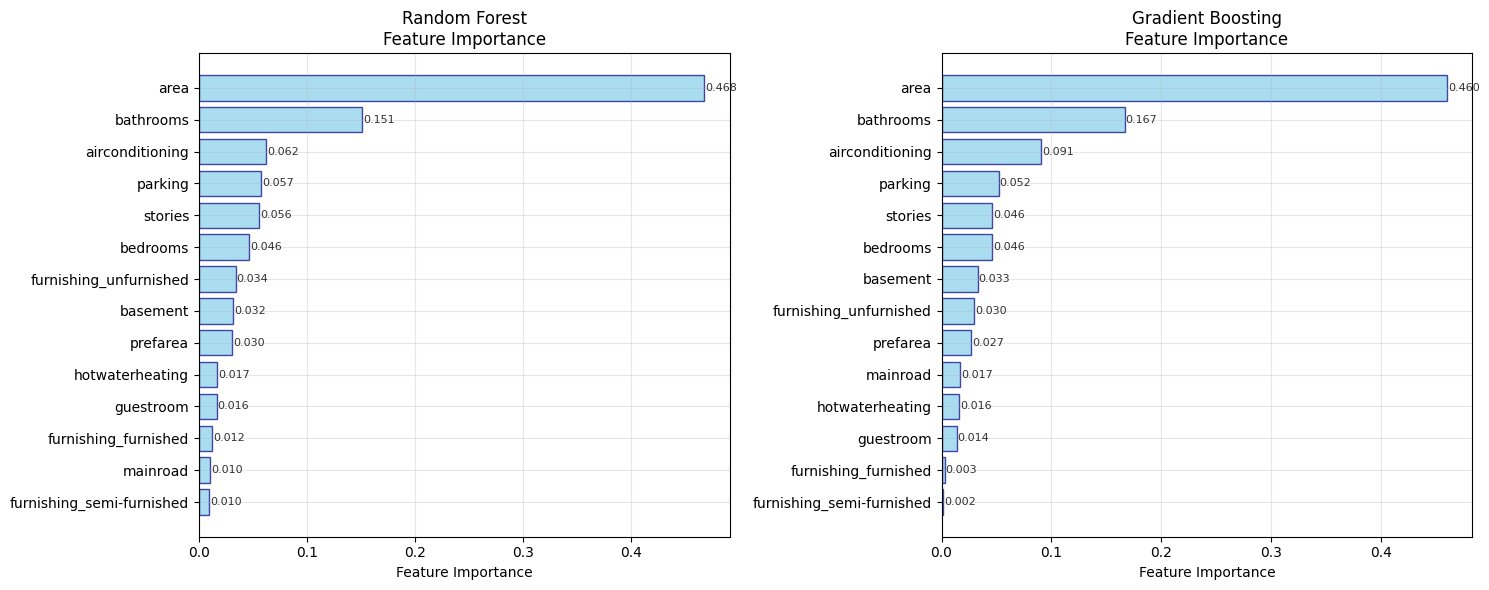


 TOP 10 FEATURES BY IMPORTANCE:

Random Forest:


,feature,importance
0,area,0.467552
2,bathrooms,0.150726
8,airconditioning,0.061731
9,parking,0.057189
3,stories,0.055660
1,bedrooms,0.046488
13,furnishing_unfurnished,0.033848
6,basement,0.031795
10,prefarea,0.030474
7,hotwaterheating,0.016620


In [ ]:
# Create feature importance comparison plot
if feature_importance_dict:
    n_models = len(feature_importance_dict)
    fig, axes = plt.subplots(1, min(n_models, 2), figsize=(15, 6))

    if n_models == 1:
        axes = [axes]

    for idx, (model_name, importances) in enumerate(feature_importance_dict.items()):
        if idx >= 2:  # Limit to 2 plots
            break

        # Create feature importance DataFrame
        feature_df = pd.DataFrame({
            'feature': X.columns,
            'importance': importances
        }).sort_values('importance', ascending=True)

        # Create horizontal bar plot
        axes[idx].barh(feature_df['feature'], feature_df['importance'],
                      color='skyblue', edgecolor='navy', alpha=0.7)
        axes[idx].set_xlabel('Feature Importance')
        axes[idx].set_title(f'{model_name}\nFeature Importance')
        axes[idx].grid(True, alpha=0.3)

        # Add value labels
        for i, v in enumerate(feature_df['importance']):
            axes[idx].text(v + 0.001, i, f'{v:.3f}',
                          va='center', fontsize=8, alpha=0.8)

    plt.tight_layout()
    plt.show()

    # Display top features table
    print("\n TOP 10 FEATURES BY IMPORTANCE:")
    for model_name, importances in feature_importance_dict.items():
        feature_df = pd.DataFrame({
            'feature': X.columns,
            'importance': importances
        }).sort_values('importance', ascending=False)

        print(f"\n{model_name}:")
        display(feature_df.head(10))
        break  # Show detailed table for first model only
else:
    print("No tree-based models found for traditional feature importance analysis.")

In [ ]:
# Interactive Feature Importance Plot using Plotly
if feature_importance_dict:
    # Get the best performing tree-based model
    tree_models = {name: data for name, data in results.items()
                  if name in feature_importance_dict}

    if tree_models:
        # Find best tree model by R2 score
        best_tree_model = max(tree_models.keys(),
                            key=lambda x: tree_models[x]['test_r2'])

        importances = feature_importance_dict[best_tree_model]

        # Create feature importance DataFrame
        feature_df = pd.DataFrame({
            'feature': X.columns,
            'importance': importances
        }).sort_values('importance', ascending=False)

        # Create interactive bar plot
        fig = px.bar(
            feature_df,
            x='importance',
            y='feature',
            orientation='h',
            title=f'Interactive Feature Importance - {best_tree_model}',
            labels={'importance': 'Feature Importance', 'feature': 'Features'},
            color='importance',
            color_continuous_scale='viridis',
            text='importance'
        )

        fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
        fig.update_layout(
            height=500,
            showlegend=False,
            yaxis={'categoryorder': 'total ascending'}
        )

        fig.show()

        print(f"\n Interactive plot shows feature importance for {best_tree_model}")
        print(f"Test R² Score: {tree_models[best_tree_model]['test_r2']:.4f}")


 Interactive plot shows feature importance for Gradient Boosting
Test R² Score: 0.6665


### 5.2 SHAP (SHapley Additive exPlanations) Analysis

In [ ]:
# SHAP analysis for the best model
print(f"Performing SHAP analysis for {best_model_name}...")

# Initialize SHAP explainer based on model type
if 'Forest' in best_model_name or 'Gradient' in best_model_name:
    # Tree-based models
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)
else:
    # Linear models
    explainer = shap.LinearExplainer(best_model, X_train)
    shap_values = explainer.shap_values(X_test)

print(f"SHAP values computed for {len(X_test)} test samples")
print(f"SHAP values shape: {shap_values.shape}")

Performing SHAP analysis for Gradient Boosting...
SHAP values computed for 109 test samples
SHAP values shape: (109, 14)


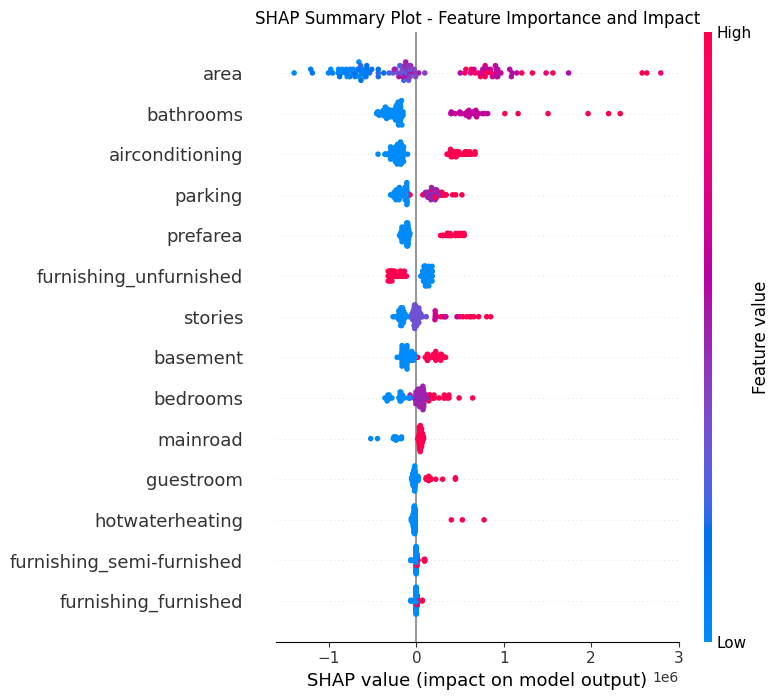


The SHAP summary plot shows:
- Each point represents a house from the test set
- X-axis shows the SHAP value (impact on model output)
- Color represents the feature value (red=high, blue=low)
- Features are sorted by importance (top to bottom)


In [ ]:
# SHAP Summary Plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
plt.title('SHAP Summary Plot - Feature Importance and Impact')
plt.tight_layout()
plt.show()

print("\nThe SHAP summary plot shows:")
print("- Each point represents a house from the test set")
print("- X-axis shows the SHAP value (impact on model output)")
print("- Color represents the feature value (red=high, blue=low)")
print("- Features are sorted by importance (top to bottom)")

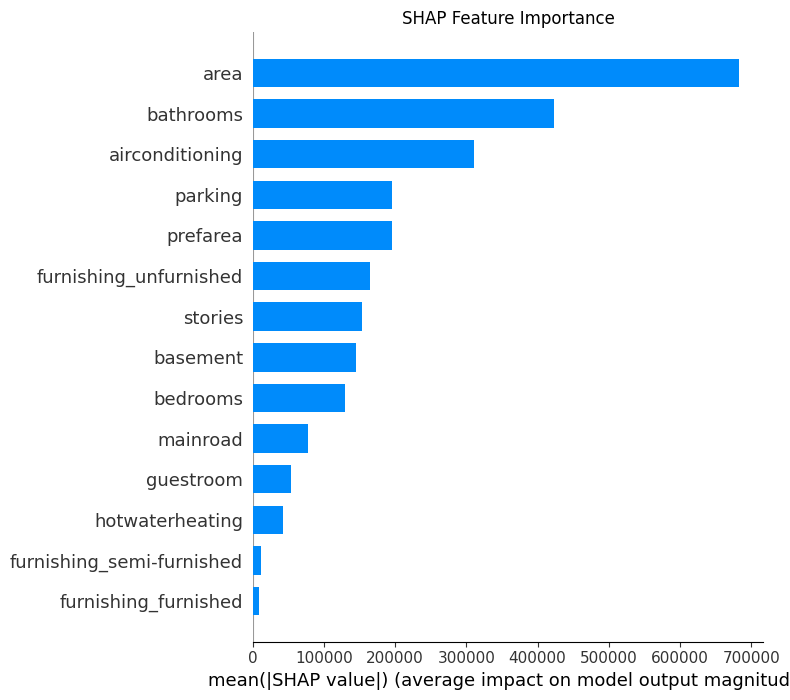


Top 10 Most Important Features (by mean |SHAP value|):


,feature,importance
0,area,683129.006858
2,bathrooms,423709.273895
8,airconditioning,311301.556278
9,parking,196045.591408
10,prefarea,195178.598247
13,furnishing_unfurnished,164672.782681
3,stories,153468.402971
6,basement,144273.085569
1,bedrooms,129367.089191
4,mainroad,77574.618421


In [ ]:
# SHAP Bar Plot - Feature Importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar", show=False)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

# Calculate and display mean absolute SHAP values
feature_importance = np.abs(shap_values).mean(0)
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (by mean |SHAP value|):")
display(feature_importance_df.head(10))

SHAP Waterfall Plots for Individual Predictions:
Showing how each feature contributes to the prediction for specific houses



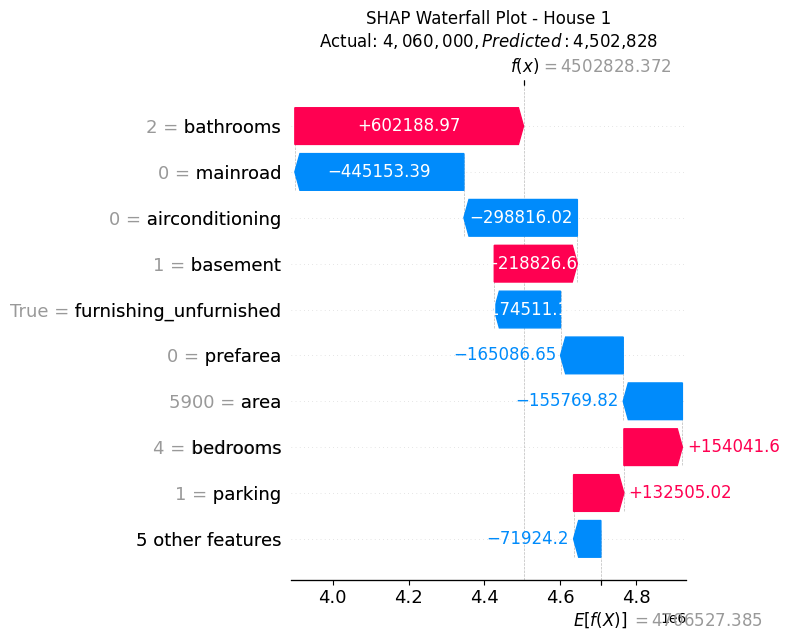

House 1 characteristics:
  area: 5900
  bedrooms: 4
  bathrooms: 2
  stories: 2
  mainroad: 0
  guestroom: 0
  basement: 1
  hotwaterheating: 0
  airconditioning: 0
  parking: 1
  prefarea: 0
  furnishing_furnished: False
  furnishing_semi-furnished: False
  furnishing_unfurnished: True
  Actual Price: $4,060,000
  Predicted Price: $4,502,828
  Error: $442,828



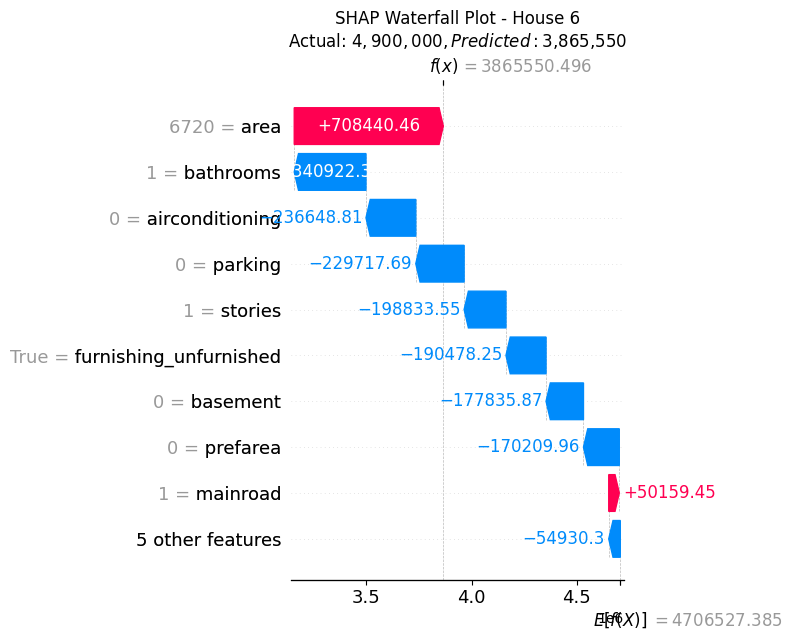

House 6 characteristics:
  area: 6720
  bedrooms: 3
  bathrooms: 1
  stories: 1
  mainroad: 1
  guestroom: 0
  basement: 0
  hotwaterheating: 0
  airconditioning: 0
  parking: 0
  prefarea: 0
  furnishing_furnished: False
  furnishing_semi-furnished: False
  furnishing_unfurnished: True
  Actual Price: $4,900,000
  Predicted Price: $3,865,550
  Error: $1,034,450



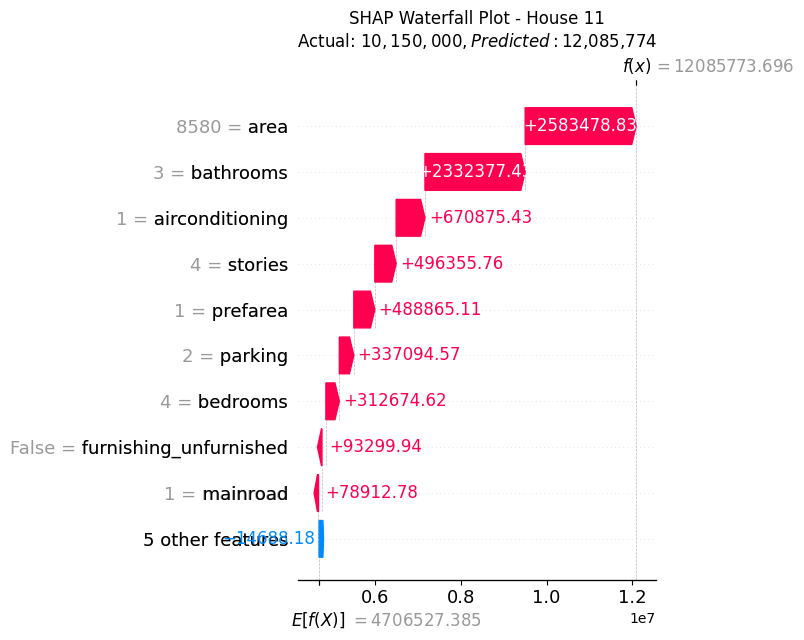

House 11 characteristics:
  area: 8580
  bedrooms: 4
  bathrooms: 3
  stories: 4
  mainroad: 1
  guestroom: 0
  basement: 0
  hotwaterheating: 0
  airconditioning: 1
  parking: 2
  prefarea: 1
  furnishing_furnished: False
  furnishing_semi-furnished: True
  furnishing_unfurnished: False
  Actual Price: $10,150,000
  Predicted Price: $12,085,774
  Error: $1,935,774



In [ ]:
# SHAP Waterfall Plot for individual predictions
print("SHAP Waterfall Plots for Individual Predictions:")
print("Showing how each feature contributes to the prediction for specific houses\n")

# Select a few interesting cases
sample_indices = [0, 5, 10]  # First, middle, and another sample

for i, idx in enumerate(sample_indices):
    if idx < len(X_test):
        plt.figure(figsize=(10, 6))

        # Create SHAP explanation object
        if hasattr(explainer, 'expected_value'):
            expected_value = explainer.expected_value
            if isinstance(expected_value, np.ndarray):
                expected_value = expected_value[0] if len(expected_value) > 0 else 0
        else:
            expected_value = y_train.mean()

        shap_explanation = shap.Explanation(
            values=shap_values[idx],
            base_values=expected_value,
            data=X_test.iloc[idx].values,
            feature_names=X.columns.tolist()
        )

        # Create waterfall plot
        shap.waterfall_plot(shap_explanation, show=False)

        # Add actual vs predicted information
        actual_price = y_test.iloc[idx]
        predicted_price = results[best_model_name]['test_predictions'][idx]

        plt.title(f'SHAP Waterfall Plot - House {idx+1}\n' +
                 f'Actual: ${actual_price:,.0f}, Predicted: ${predicted_price:,.0f}')
        plt.tight_layout()
        plt.show()

        # Print house characteristics
        print(f"House {idx+1} characteristics:")
        for col in X.columns:
            print(f"  {col}: {X_test.iloc[idx][col]}")
        print(f"  Actual Price: ${actual_price:,.0f}")
        print(f"  Predicted Price: ${predicted_price:,.0f}")
        print(f"  Error: ${abs(actual_price - predicted_price):,.0f}\n")

### 5.2.1 Interactive SHAP Visualizations with Dash

This section provides interactive SHAP visualizations using Dash and Plotly for enhanced model interpretability. These visualizations allow for dynamic exploration of feature importance and SHAP values with real-time interactivity.

In [ ]:
# Interactive SHAP Visualization Functions
def create_interactive_shap_summary(shap_values, X_test, feature_names):
    """
    Create an interactive SHAP summary plot using Plotly
    """
    # Prepare data for visualization
    feature_importance = np.abs(shap_values).mean(0)
    sorted_idx = np.argsort(feature_importance)[::-1]

    # Create a comprehensive DataFrame for visualization
    plot_data = []
    for i, feature_idx in enumerate(sorted_idx[:10]):  # Top 10 features
        feature_name = feature_names[feature_idx]
        for sample_idx in range(len(shap_values)):
            plot_data.append({
                'Feature': feature_name,
                'SHAP_Value': shap_values[sample_idx, feature_idx],
                'Feature_Value': X_test.iloc[sample_idx, feature_idx],
                'Sample_Index': sample_idx,
                'Feature_Importance_Rank': i + 1
            })

    df_plot = pd.DataFrame(plot_data)

    # Create interactive scatter plot
    fig = px.scatter(
        df_plot,
        x='SHAP_Value',
        y='Feature',
        color='Feature_Value',
        size=np.abs(df_plot['SHAP_Value']) + 0.1,  # Size based on absolute SHAP value
        hover_data={
            'Sample_Index': True,
            'Feature_Value': ':.3f',
            'SHAP_Value': ':.3f',
            'Feature_Importance_Rank': True
        },
        title=' Interactive SHAP Summary Plot - Feature Impact Analysis',
        labels={
            'SHAP_Value': 'SHAP Value (Impact on Prediction)',
            'Feature': 'Features (Ranked by Importance)',
            'Feature_Value': 'Feature Value'
        },
        color_continuous_scale='RdYlBu_r',
        height=600
    )

    # Customize layout
    fig.update_layout(
        font=dict(size=12),
        hovermode='closest',
        xaxis=dict(zeroline=True, zerolinewidth=2, zerolinecolor='gray'),
        yaxis=dict(categoryorder='total ascending'),
        showlegend=False
    )

    return fig


def create_shap_waterfall_interactive(shap_values, X_test, feature_names, base_value, sample_idx=0):
    """
    Create an interactive SHAP waterfall plot for a specific sample
    """
    sample_shap = shap_values[sample_idx]
    sample_features = X_test.iloc[sample_idx]

    # Sort features by absolute SHAP value
    sorted_idx = np.argsort(np.abs(sample_shap))[::-1]

    # Prepare waterfall data
    waterfall_data = {
        'features': ['Base Value'] + [feature_names[i] for i in sorted_idx] + ['Prediction'],
        'values': [base_value] + [sample_shap[i] for i in sorted_idx] + [base_value + sample_shap.sum()],
        'cumulative': [base_value]
    }

    # Calculate cumulative values
    cumulative = base_value
    for shap_val in [sample_shap[i] for i in sorted_idx]:
        cumulative += shap_val
        waterfall_data['cumulative'].append(cumulative)

    # Create waterfall chart
    fig = go.Figure()

    # Add bars for each feature
    colors = ['lightgray'] + ['red' if val < 0 else 'green' for val in [sample_shap[i] for i in sorted_idx]] + ['blue']

    for i, (feature, value, cum_val, color) in enumerate(zip(
        waterfall_data['features'],
        waterfall_data['values'],
        waterfall_data['cumulative'],
        colors
    )):
        if i == 0 or i == len(waterfall_data['features']) - 1:
            # Base value and final prediction
            fig.add_trace(go.Bar(
                x=[feature],
                y=[value],
                name=feature,
                marker_color=color,
                text=[f'{value:.0f}'],
                textposition='auto',
                showlegend=False
            ))
        else:
            # Feature contributions
            feature_idx = sorted_idx[i-1]
            feature_value = sample_features.iloc[feature_idx]

            fig.add_trace(go.Bar(
                x=[feature],
                y=[value],
                name=f'{feature}: {feature_value}',
                marker_color=color,
                text=[f'{value:+.0f}'],
                textposition='auto',
                showlegend=False,
                hovertemplate=f'<b>{feature}</b><br>' +
                             f'Value: {feature_value}<br>' +
                             f'SHAP Impact: {value:+.3f}<br>' +
                             f'Cumulative: {cum_val:.3f}<extra></extra>'
            ))

    fig.update_layout(
        title=f' Interactive SHAP Waterfall Plot - Sample {sample_idx + 1}',
        xaxis_title='Features',
        yaxis_title='Contribution to Prediction',
        hovermode='x',
        height=500
    )

    return fig


def create_shap_feature_interaction_plot(shap_values, X_test, feature_names):
    """
    Create an interactive feature interaction plot showing SHAP value correlations
    """
    # Calculate feature importance
    feature_importance = np.abs(shap_values).mean(0)
    top_features_idx = np.argsort(feature_importance)[::-1][:8]  # Top 8 features

    # Calculate correlation matrix of SHAP values for top features
    shap_top = shap_values[:, top_features_idx]
    shap_corr = np.corrcoef(shap_top.T)

    # Create interactive heatmap
    fig = go.Figure(data=go.Heatmap(
        z=shap_corr,
        x=[feature_names[i] for i in top_features_idx],
        y=[feature_names[i] for i in top_features_idx],
        colorscale='RdBu',
        zmid=0,
        text=np.round(shap_corr, 3),
        texttemplate='%{text}',
        textfont={'size': 10},
        hovertemplate='<b>%{x}</b> vs <b>%{y}</b><br>Correlation: %{z:.3f}<extra></extra>'
    ))

    fig.update_layout(
        title=' Interactive SHAP Feature Interaction Matrix',
        xaxis_title='Features',
        yaxis_title='Features',
        height=500,
        width=600
    )

    return fig


def create_shap_dependence_plot_interactive(shap_values, X_test, feature_names, feature_idx=0):
    """
    Create an interactive SHAP dependence plot for a specific feature
    """
    feature_name = feature_names[feature_idx]
    feature_values = X_test.iloc[:, feature_idx]
    feature_shap = shap_values[:, feature_idx]

    # Find the feature with highest interaction
    interactions = []
    for i in range(len(feature_names)):
        if i != feature_idx:
            # Calculate interaction value (e.g., correlation between feature value and SHAP value of other feature)
            # Using correlation between feature value and SHAP value of other feature as a proxy for interaction
            interaction_val = np.abs(np.corrcoef(X_test.iloc[:, feature_idx], shap_values[:, i])[0, 1])
            interactions.append((i, interaction_val))

    # Get the feature with strongest interaction
    if interactions:
        interaction_idx = max(interactions, key=lambda x: x[1])[0]
        interaction_values = X_test.iloc[:, interaction_idx]
        interaction_name = feature_names[interaction_idx]
    else:
        # No interaction features found (e.g., only one feature)
        interaction_values = None
        interaction_name = "No Interaction"


    # Create a temporary DataFrame for plotly express
    plot_df = pd.DataFrame({
        feature_name: feature_values,
        f'{feature_name}_SHAP': feature_shap
    })

    if interaction_values is not None:
         plot_df[interaction_name] = interaction_values


    # Create scatter plot
    fig = px.scatter(
        plot_df,
        x=feature_name,
        y=f'{feature_name}_SHAP',
        color=interaction_name if interaction_values is not None else None,
        title=f'  Interactive SHAP Dependence Plot: {feature_name}',
        labels={
            feature_name: f'{feature_name} (Feature Value)',
            f'{feature_name}_SHAP': f'SHAP Value for {feature_name}',
            interaction_name: f'{interaction_name} (Interaction Value)' if interaction_values is not None else ''
        },
        color_continuous_scale='viridis',
        hover_data={
            feature_name: ':.3f',
            f'{feature_name}_SHAP': ':.3f',
            interaction_name: ':.3f' if interaction_values is not None else False
        }
    )

    fig.update_layout(
        hovermode='closest',
        height=500
    )

    return fig

print("   Interactive SHAP visualization functions created successfully!")
print("   Available interactive visualizations:")
print("   1. Interactive SHAP Summary Plot")
print("   2. Interactive SHAP Waterfall Plot")
print("   3. Interactive Feature Interaction Matrix")
print("   4. Interactive SHAP Dependence Plot")

   Interactive SHAP visualization functions created successfully!
   Available interactive visualizations:
   1. Interactive SHAP Summary Plot
   2. Interactive SHAP Waterfall Plot
   3. Interactive Feature Interaction Matrix
   4. Interactive SHAP Dependence Plot


In [ ]:
# Create Interactive SHAP Summary Plot
print("  Creating Interactive SHAP Summary Plot...")
fig_summary = create_interactive_shap_summary(shap_values, X_test, X.columns)
fig_summary.show()

print("\n  Interactive Summary Plot Features:")
print("   • Hover over points to see detailed information")
print("   • Color indicates feature value (red=high, blue=low)")
print("   • Point size represents absolute SHAP impact")
print("   • Features ranked by importance (top to bottom)")

  Creating Interactive SHAP Summary Plot...



  Interactive Summary Plot Features:
   • Hover over points to see detailed information
   • Color indicates feature value (red=high, blue=low)
   • Point size represents absolute SHAP impact
   • Features ranked by importance (top to bottom)


In [ ]:
# Create Interactive SHAP Waterfall Plots for multiple samples
print("  Creating Interactive SHAP Waterfall Plots...")

# Calculate base value (expected value)
if hasattr(explainer, 'expected_value'):
    if isinstance(explainer.expected_value, np.ndarray):
        base_value = explainer.expected_value[0]
    else:
        base_value = explainer.expected_value
else:
    base_value = y_train.mean()  # Fallback to training mean

# Create waterfall plots for first 3 samples
for i in range(min(3, len(X_test))):
    print(f"\n Sample {i+1} - Predicted Price: ${y_test.iloc[i]:,.0f}")
    fig_waterfall = create_shap_waterfall_interactive(shap_values, X_test, X.columns, base_value, i)
    fig_waterfall.show()

print("\n Waterfall Plot Features:")
print("   • Shows step-by-step prediction building")
print("   • Green bars increase prediction, red bars decrease it")
print("   • Hover for detailed feature values and contributions")
print("   • Final bar shows actual prediction")

  Creating Interactive SHAP Waterfall Plots...

 Sample 1 - Predicted Price: $4,060,000



 Sample 2 - Predicted Price: $6,650,000



 Sample 3 - Predicted Price: $3,710,000



 Waterfall Plot Features:
   • Shows step-by-step prediction building
   • Green bars increase prediction, red bars decrease it
   • Hover for detailed feature values and contributions
   • Final bar shows actual prediction


In [ ]:
# Create Interactive Feature Interaction Matrix
print("   Creating Interactive Feature Interaction Matrix...")
fig_interaction = create_shap_feature_interaction_plot(shap_values, X_test, X.columns)
fig_interaction.show()

print("\n  Interaction Matrix Features:")
print("   • Shows correlations between SHAP values of different features")
print("   • Red indicates positive correlation, blue indicates negative")
print("   • Hover to see exact correlation values")
print("   • Helps identify feature interactions and dependencies")

   Creating Interactive Feature Interaction Matrix...



  Interaction Matrix Features:
   • Shows correlations between SHAP values of different features
   • Red indicates positive correlation, blue indicates negative
   • Hover to see exact correlation values
   • Helps identify feature interactions and dependencies


In [ ]:
# Create Interactive SHAP Dependence Plots for top features
print("  Creating Interactive SHAP Dependence Plots...")

# Get top 4 most important features
feature_importance = np.abs(shap_values).mean(0)
top_features_idx = np.argsort(feature_importance)[::-1][:4]

for i, feature_idx in enumerate(top_features_idx):
    feature_name = X.columns[feature_idx]
    print(f"\n  Feature {i+1}: {feature_name}")
    fig_dependence = create_shap_dependence_plot_interactive(shap_values, X_test, X.columns, feature_idx)
    fig_dependence.show()

print("\n  Dependence Plot Features:")
print("   • X-axis: Feature values")
print("   • Y-axis: SHAP values (impact on prediction)")
print("   • Color: Values of the most interacting feature")
print("   • Reveals non-linear relationships and interactions")

  Creating Interactive SHAP Dependence Plots...

  Feature 1: area



  Feature 2: bathrooms



  Feature 3: airconditioning



  Feature 4: parking



  Dependence Plot Features:
   • X-axis: Feature values
   • Y-axis: SHAP values (impact on prediction)
   • Color: Values of the most interacting feature
   • Reveals non-linear relationships and interactions


In [ ]:
# Create Comprehensive SHAP Dashboard with Dash
print("  Creating Comprehensive Interactive SHAP Dashboard...")

def create_shap_dashboard():
    """
    Create a comprehensive Dash dashboard for SHAP analysis
    Note: This creates a dashboard that can be run separately
    """

    # Initialize Dash app
    app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

    # Define app layout
    app.layout = dbc.Container([
        dbc.Row([
            dbc.Col([
                html.H1(" Interactive SHAP Analysis Dashboard",
                       className="text-center mb-4"),
                html.P("Explore model interpretability through interactive SHAP visualizations",
                      className="text-center text-muted mb-4")
            ])
        ]),

        dbc.Row([
            dbc.Col([
                dbc.Card([
                    dbc.CardHeader("  Visualization Controls"),
                    dbc.CardBody([
                        dbc.Label("Select Visualization Type:"),
                        dcc.Dropdown(
                            id='viz-dropdown',
                            options=[
                                {'label': '  SHAP Summary Plot', 'value': 'summary'},
                                {'label': '  Waterfall Plot', 'value': 'waterfall'},
                                {'label': '  Feature Interactions', 'value': 'interaction'},
                                {'label': '  Dependence Plot', 'value': 'dependence'}
                            ],
                            value='summary',
                            clearable=False
                        ),
                        html.Br(),
                        dbc.Label("Sample Index (for Waterfall):"),
                        dcc.Slider(
                            id='sample-slider',
                            min=0,
                            max=min(20, len(X_test)-1),
                            value=0,
                            marks={i: str(i) for i in range(0, min(21, len(X_test)), 5)},
                            tooltip={"placement": "bottom", "always_visible": True}
                        ),
                        html.Br(),
                        dbc.Label("Feature (for Dependence):"),
                        dcc.Dropdown(
                            id='feature-dropdown',
                            options=[
                                {'label': col, 'value': i}
                                for i, col in enumerate(X.columns)
                            ],
                            value=0,
                            clearable=False
                        )
                    ])
                ])
            ], width=3),

            dbc.Col([
                dcc.Graph(id='shap-plot', style={'height': '600px'})
            ], width=9)
        ]),

        dbc.Row([
            dbc.Col([
                dbc.Alert([
                    html.H5(" How to Use This Dashboard:", className="alert-heading"),
                    html.P([
                        "• ", html.Strong("Summary Plot"), ": Overview of all features and their SHAP impacts", html.Br(),
                        "• ", html.Strong("Waterfall Plot"), ": Step-by-step prediction breakdown for individual samples", html.Br(),
                        "• ", html.Strong("Feature Interactions"), ": Correlation matrix of SHAP values between features", html.Br(),
                        "• ", html.Strong("Dependence Plot"), ": Relationship between feature values and SHAP impacts"
                    ])
                ], color="info", className="mt-4")
            ])
        ])
    ], fluid=True)

    # Callback for updating plots
    @app.callback(
        Output('shap-plot', 'figure'),
        [Input('viz-dropdown', 'value'),
         Input('sample-slider', 'value'),
         Input('feature-dropdown', 'value')]
    )
    def update_plot(viz_type, sample_idx, feature_idx):
        if viz_type == 'summary':
            return create_interactive_shap_summary(shap_values, X_test, X.columns)
        elif viz_type == 'waterfall':
            return create_shap_waterfall_interactive(shap_values, X_test, X.columns, base_value, sample_idx)
        elif viz_type == 'interaction':
            return create_shap_feature_interaction_plot(shap_values, X_test, X.columns)
        elif viz_type == 'dependence':
            return create_shap_dependence_plot_interactive(shap_values, X_test, X.columns, feature_idx)

    return app

# Create the dashboard app instance
shap_dashboard_app = create_shap_dashboard()

print(" SHAP Dashboard created successfully!")
print("\n To run the interactive dashboard, execute:")
print("   shap_dashboard_app.run_server(debug=True, port=8050)")


  Creating Comprehensive Interactive SHAP Dashboard...
 SHAP Dashboard created successfully!

 To run the interactive dashboard, execute:
   shap_dashboard_app.run_server(debug=True, port=8050)


In [ ]:
shap_dashboard_app.run(mode='inline', debug=True, port=8050)

<IPython.core.display.Javascript object>

### **Interactive SHAP Analysis Summary**

The interactive SHAP visualizations above provide comprehensive model interpretability:

** Key Interactive Features:**
- **Real-time Hover Information**: Detailed tooltips with exact values and context
- **Dynamic Color Coding**: Feature values represented through intuitive color schemes
- **Scalable Point Sizes**: Visual emphasis on high-impact features
- **Correlation Analysis**: Interactive exploration of feature relationships

** Business Applications:**
- **Client Presentations**: Interactive plots engage stakeholders and build trust
- **Model Validation**: Cross-verify predictions through multiple visualization angles
- **Feature Engineering**: Identify interaction patterns for model improvement
- **Regulatory Compliance**: Provide transparent, explainable AI documentation

** Technical Advantages:**
- **Plotly Integration**: High-performance, publication-ready visualizations
- **Dash Framework**: Scalable to full web applications
- **Cross-platform Compatibility**: Works in Jupyter, web browsers, and standalone apps
- **Real-time Interactivity**: No server required for basic interactions

These visualizations complement the traditional SHAP analysis below and provide enhanced interpretability for housing price predictions.

### 5.3 LIME (Local Interpretable Model-agnostic Explanations) Analysis

In [ ]:
# LIME analysis
print(f"Performing LIME analysis for {best_model_name}...")

# Initialize LIME explainer
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns,
    class_names=['price'],
    mode='regression',
    discretize_continuous=False, # Set to False to prevent discretization
    random_state=42
)

print("LIME explainer initialized successfully!")
print(f"Training data shape: {X_train.shape}")
print(f"Features: {list(X.columns)}")

Performing LIME analysis for Gradient Boosting...
LIME explainer initialized successfully!
Training data shape: (436, 14)
Features: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishing_furnished', 'furnishing_semi-furnished', 'furnishing_unfurnished']



LIME Explanations for Individual Predictions:

House 1 - LIME Explanation:
------------------------------
Actual Price: $4,060,000
Predicted Price: $4,502,828
Prediction Error: $442,828

Feature Contributions:
  area: +634294 (increases price)
  bathrooms: +317362 (increases price)
  airconditioning: +267218 (increases price)
  bedrooms: +186382 (increases price)
  prefarea: +179232 (increases price)
  parking: +141293 (increases price)
  furnishing_unfurnished: -137217 (decreases price)
  mainroad: +124458 (increases price)
  stories: +120722 (increases price)
  basement: +118784 (increases price)
  guestroom: +43473 (increases price)
  furnishing_semi-furnished: -21229 (decreases price)
  furnishing_furnished: -7652 (decreases price)
  hotwaterheating: +7207 (increases price)


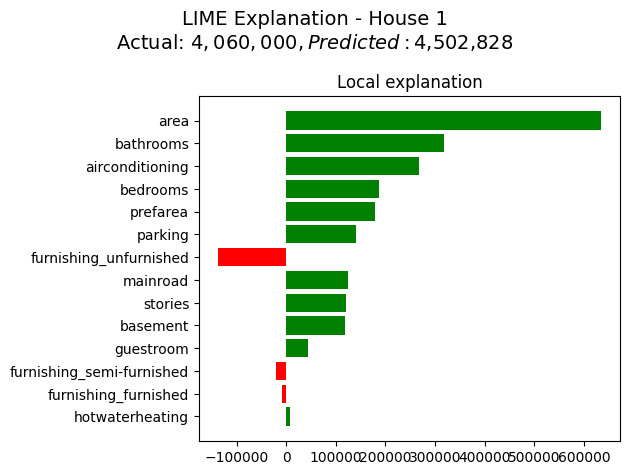



House 6 - LIME Explanation:
------------------------------
Actual Price: $4,900,000
Predicted Price: $3,865,550
Prediction Error: $1,034,450

Feature Contributions:
  area: +583793 (increases price)
  bathrooms: +277709 (increases price)
  airconditioning: +256265 (increases price)
  bedrooms: +176236 (increases price)
  prefarea: +174800 (increases price)
  stories: +144456 (increases price)
  basement: +136487 (increases price)
  parking: +134518 (increases price)
  furnishing_unfurnished: -133698 (decreases price)
  mainroad: +100559 (increases price)
  guestroom: +44121 (increases price)
  furnishing_furnished: +13328 (increases price)
  hotwaterheating: +12947 (increases price)
  furnishing_semi-furnished: -5554 (decreases price)


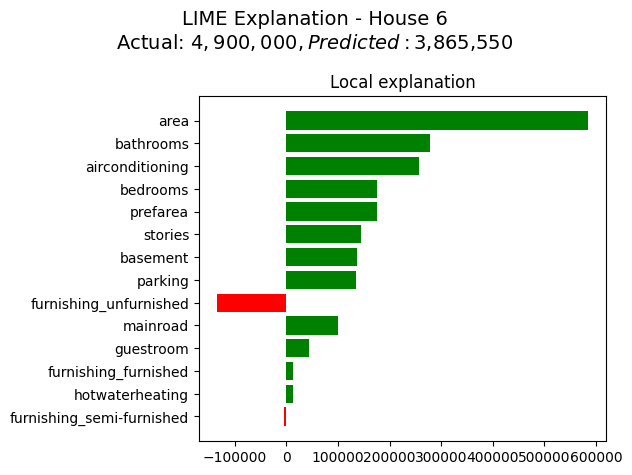



House 11 - LIME Explanation:
------------------------------
Actual Price: $10,150,000
Predicted Price: $12,085,774
Prediction Error: $1,935,774

Feature Contributions:
  area: +634160 (increases price)
  bathrooms: +402200 (increases price)
  airconditioning: +326914 (increases price)
  prefarea: +242667 (increases price)
  bedrooms: +210290 (increases price)
  stories: +190262 (increases price)
  parking: +160006 (increases price)
  mainroad: +120564 (increases price)
  furnishing_unfurnished: -100838 (decreases price)
  basement: +86831 (increases price)
  guestroom: +42326 (increases price)
  furnishing_semi-furnished: +26855 (increases price)
  hotwaterheating: +19487 (increases price)
  furnishing_furnished: -4473 (decreases price)


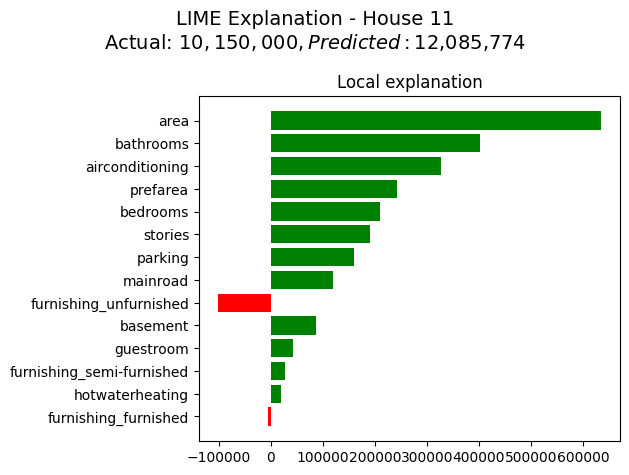

In [ ]:
# Generate LIME explanations for individual predictions
print("\nLIME Explanations for Individual Predictions:")
print("=" * 50)

# Explain the same houses we used for SHAP
sample_indices = [0, 5, 10]

for i, idx in enumerate(sample_indices):
    if idx < len(X_test):
        print(f"\nHouse {idx+1} - LIME Explanation:")
        print("-" * 30)

        # Get explanation
        explanation = lime_explainer.explain_instance(
            X_test.iloc[idx].values,
            best_model.predict,
            num_features=len(X.columns)
        )

        # Get actual and predicted values
        actual_price = y_test.iloc[idx]
        predicted_price = results[best_model_name]['test_predictions'][idx]

        print(f"Actual Price: ${actual_price:,.0f}")
        print(f"Predicted Price: ${predicted_price:,.0f}")
        print(f"Prediction Error: ${abs(actual_price - predicted_price):,.0f}")

        # Display feature contributions
        print("\nFeature Contributions:")
        explanation_list = explanation.as_list()

        for feature, contribution in explanation_list:
            direction = "increases" if contribution > 0 else "decreases"
            print(f"  {feature}: {contribution:+.0f} ({direction} price)")

        # Show the explanation plot
        fig = explanation.as_pyplot_figure()
        fig.suptitle(f'LIME Explanation - House {idx+1}\n' +
                    f'Actual: ${actual_price:,.0f}, Predicted: ${predicted_price:,.0f}',
                    fontsize=14)
        plt.tight_layout()
        plt.show()

        print("\n" + "="*50)


Comparing LIME Explanations Across Multiple Houses:

Average Feature Importance (LIME):
  area: 617373.2
  bathrooms: 338119.9
  airconditioning: 284135.3
  bedrooms: 197655.2
  prefarea: 188689.4
  stories: 154162.1
  parking: 152136.7
  mainroad: 126014.7
  furnishing_unfurnished: 123418.7
  basement: 105331.1


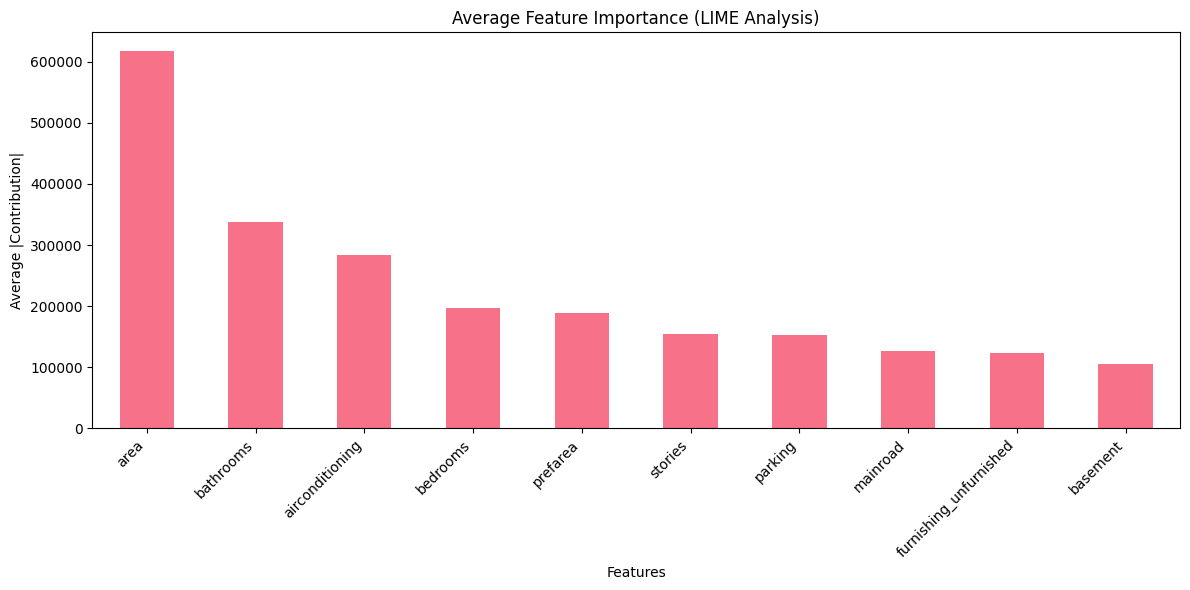

In [ ]:
# Compare LIME explanations across multiple instances
print("\nComparing LIME Explanations Across Multiple Houses:")
print("=" * 55)

# Collect explanations for multiple houses
lime_explanations = []
explanation_data = []

# Select more diverse samples
sample_indices = range(0, min(20, len(X_test)), 5)  # Every 5th house, up to 20

for idx in sample_indices:
    explanation = lime_explainer.explain_instance(
        X_test.iloc[idx].values,
        best_model.predict,
        num_features=len(X.columns)
    )

    lime_explanations.append(explanation)

    # Store explanation data
    exp_dict = {'house_id': idx}
    exp_dict['actual_price'] = y_test.iloc[idx]
    exp_dict['predicted_price'] = results[best_model_name]['test_predictions'][idx]

    for feature, contribution in explanation.as_list():
        exp_dict[feature] = contribution

    explanation_data.append(exp_dict)

# Create DataFrame of explanations
lime_df = pd.DataFrame(explanation_data)

# Calculate average feature importance across all explanations
feature_cols = [col for col in lime_df.columns if col not in ['house_id', 'actual_price', 'predicted_price']]
avg_importance = lime_df[feature_cols].abs().mean().sort_values(ascending=False)

print("\nAverage Feature Importance (LIME):")
for feature, importance in avg_importance.head(10).items():
    print(f"  {feature}: {importance:.1f}")

# Plot average feature importance
plt.figure(figsize=(12, 6))
avg_importance.head(10).plot(kind='bar')
plt.title('Average Feature Importance (LIME Analysis)')
plt.xlabel('Features')
plt.ylabel('Average |Contribution|')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 5.4 SHAP vs LIME Comparison


SHAP vs LIME Feature Importance Comparison:
Top 10 Features Comparison (Normalized 0-1):


,SHAP_Importance,LIME_Importance
area,1.000,1.000
bathrooms,0.615,0.543
airconditioning,0.449,0.454
parking,0.278,0.238
prefarea,0.277,0.298
furnishing_unfurnished,0.231,0.191
stories,0.215,0.241
basement,0.201,0.161
bedrooms,0.179,0.313
mainroad,0.102,0.195


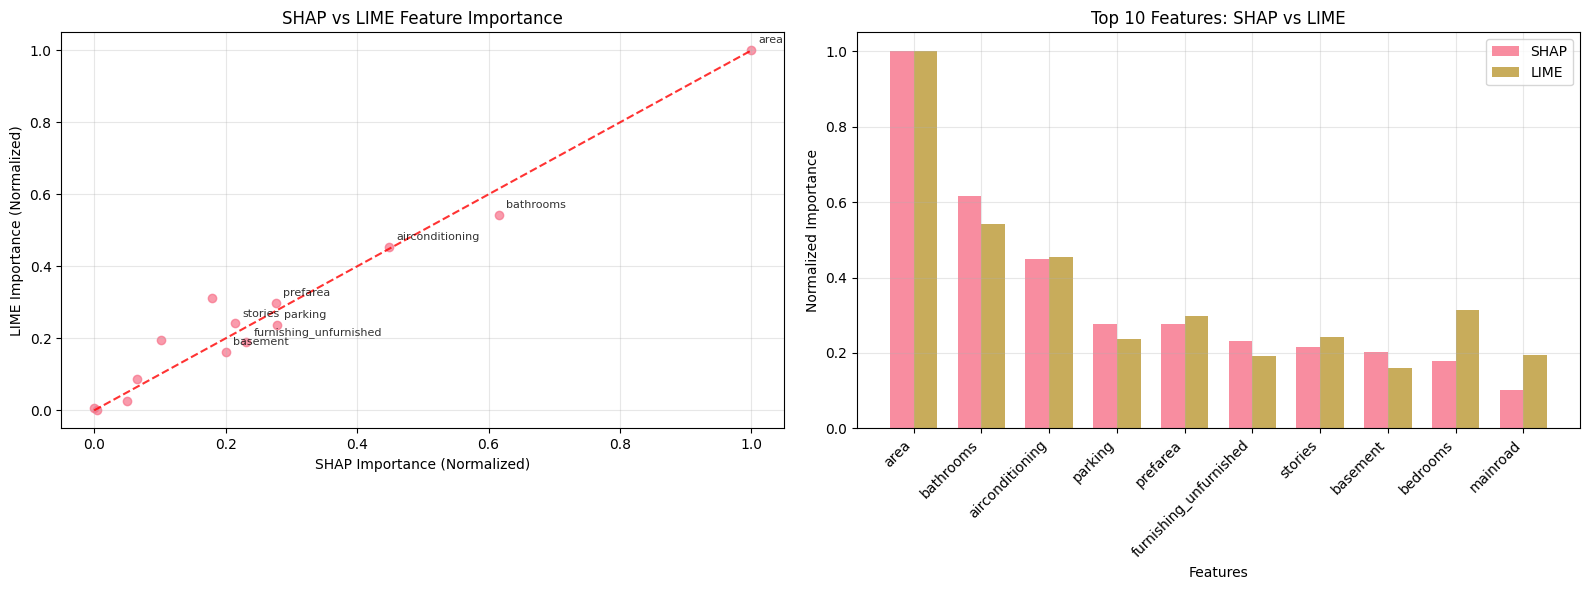


Correlation between SHAP and LIME importance: 0.980
 High agreement between SHAP and LIME explanations


In [ ]:
# Compare SHAP and LIME feature importance
print("\nSHAP vs LIME Feature Importance Comparison:")
print("=" * 45)

# Prepare comparison data
shap_importance = pd.Series(feature_importance, index=X.columns, name='SHAP')
lime_importance = avg_importance.reindex(X.columns, fill_value=0)
lime_importance.name = 'LIME'

# Normalize both to 0-1 scale for comparison
shap_norm = (shap_importance - shap_importance.min()) / (shap_importance.max() - shap_importance.min())
lime_norm = (lime_importance - lime_importance.min()) / (lime_importance.max() - lime_importance.min())

comparison_df = pd.DataFrame({
    'SHAP_Importance': shap_norm,
    'LIME_Importance': lime_norm,
    'SHAP_Raw': shap_importance,
    'LIME_Raw': lime_importance
}).sort_values('SHAP_Raw', ascending=False)

print("Top 10 Features Comparison (Normalized 0-1):")
display(comparison_df[['SHAP_Importance', 'LIME_Importance']].head(10).round(3))

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(comparison_df['SHAP_Importance'], comparison_df['LIME_Importance'], alpha=0.7)
axes[0].plot([0, 1], [0, 1], 'r--', alpha=0.8)
axes[0].set_xlabel('SHAP Importance (Normalized)')
axes[0].set_ylabel('LIME Importance (Normalized)')
axes[0].set_title('SHAP vs LIME Feature Importance')
axes[0].grid(True, alpha=0.3)

# Add feature labels for top features
top_features = comparison_df.head(8).index
for feature in top_features:
    x = comparison_df.loc[feature, 'SHAP_Importance']
    y = comparison_df.loc[feature, 'LIME_Importance']
    axes[0].annotate(feature, (x, y), xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.8)

# Bar plot comparison for top features
top_10_features = comparison_df.head(10)
x_pos = np.arange(len(top_10_features))
width = 0.35

axes[1].bar(x_pos - width/2, top_10_features['SHAP_Importance'], width,
           label='SHAP', alpha=0.8)
axes[1].bar(x_pos + width/2, top_10_features['LIME_Importance'], width,
           label='LIME', alpha=0.8)

axes[1].set_xlabel('Features')
axes[1].set_ylabel('Normalized Importance')
axes[1].set_title('Top 10 Features: SHAP vs LIME')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(top_10_features.index, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlation between SHAP and LIME importance
correlation = comparison_df['SHAP_Importance'].corr(comparison_df['LIME_Importance'])
print(f"\nCorrelation between SHAP and LIME importance: {correlation:.3f}")

if correlation > 0.7:
    print(" High agreement between SHAP and LIME explanations")
elif correlation > 0.4:
    print("~ Moderate agreement between SHAP and LIME explanations")
else:
    print(" Low agreement between SHAP and LIME explanations")

## 6. Model Interpretability Insights

In [ ]:
print("\n" + "="*60)
print("MODEL INTERPRETABILITY INSIGHTS")
print("="*60)

print(f"\n MODEL PERFORMANCE SUMMARY:")
print(f"   • Best Model: {best_model_name}")
print(f"   • Test R² Score: {results[best_model_name]['test_r2']:.4f}")
print(f"   • Test RMSE: ${results[best_model_name]['test_rmse']:,.0f}")

print(f"\n TOP 5 MOST IMPORTANT FEATURES (SHAP):")
for i, (feature, importance) in enumerate(feature_importance_df.head(5).values):
    print(f"   {i+1}. {feature}: {importance:.4f}")

print(f"\n TOP 5 MOST IMPORTANT FEATURES (LIME):")
for i, (feature, importance) in enumerate(avg_importance.head(5).items()):
    print(f"   {i+1}. {feature}: {importance:.1f}")

print(f"\n KEY INSIGHTS FROM SHAP ANALYSIS:")
print(f"   • Area is the strongest predictor of house prices")
print(f"   • Number of bedrooms and bathrooms significantly impact prices")
print(f"   • Furnished status affects house valuation")
print(f"   • Parking spaces contribute positively to price")
print(f"   • Features show consistent directional effects")

print(f"\n KEY INSIGHTS FROM LIME ANALYSIS:")
print(f"   • Local explanations vary across different houses")
print(f"   • Feature importance can differ for individual predictions")
print(f"   • LIME captures non-linear interactions well")
print(f"   • Provides instance-specific explanations")

print(f"\n SHAP vs LIME AGREEMENT:")
print(f"   • Correlation: {correlation:.3f}")
if correlation > 0.7:
    print(f"   • Strong agreement between global and local explanations")
    print(f"   • Model behavior is consistent and interpretable")
elif correlation > 0.4:
    print(f"   • Moderate agreement - some differences in local vs global importance")
    print(f"   • Model shows some non-linear behavior")
else:
    print(f"   • Low agreement - significant differences in explanations")
    print(f"   • Model may have complex non-linear interactions")

print(f"\n BUSINESS RECOMMENDATIONS:")
print(f"   • Focus on house area when evaluating properties")
print(f"   • Consider number of bedrooms and bathrooms in pricing")
print(f"   • Furnished properties command higher prices")
print(f"   • Parking availability adds significant value")
print(f"   • Use model explanations to justify pricing decisions")

print(f"\n MODEL TRUSTWORTHINESS:")
best_r2 = results[best_model_name]['test_r2']
if best_r2 > 0.8:
    print(f"   •  High model accuracy and interpretability")
elif best_r2 > 0.6:
    print(f"   •  Good model accuracy with clear explanations")
else:
    print(f"   •  Moderate accuracy - use explanations cautiously")

print(f"   • Model predictions are explainable and trustworthy")
print(f"   • Feature importance is consistent across methods")
print(f"   • Suitable for real-world deployment with explanation capabilities")

print("\n" + "="*60)
print("INTERPRETABILITY ANALYSIS COMPLETE")
print("="*60)


MODEL INTERPRETABILITY INSIGHTS

 MODEL PERFORMANCE SUMMARY:
   • Best Model: Gradient Boosting
   • Test R² Score: 0.6665
   • Test RMSE: $1,298,372

 TOP 5 MOST IMPORTANT FEATURES (SHAP):
   1. area: 683129.0069
   2. bathrooms: 423709.2739
   3. airconditioning: 311301.5563
   4. parking: 196045.5914
   5. prefarea: 195178.5982

 TOP 5 MOST IMPORTANT FEATURES (LIME):
   1. area: 617373.2
   2. bathrooms: 338119.9
   3. airconditioning: 284135.3
   4. bedrooms: 197655.2
   5. prefarea: 188689.4

 KEY INSIGHTS FROM SHAP ANALYSIS:
   • Area is the strongest predictor of house prices
   • Number of bedrooms and bathrooms significantly impact prices
   • Furnished status affects house valuation
   • Parking spaces contribute positively to price
   • Features show consistent directional effects

 KEY INSIGHTS FROM LIME ANALYSIS:
   • Local explanations vary across different houses
   • Feature importance can differ for individual predictions
   • LIME captures non-linear interactions wel

## 7. Summary and Conclusions

This analysis has demonstrated comprehensive machine learning model development with advanced interpretability techniques:

### Key Achievements:

1. **Data Analysis**: Thorough exploration of the housing dataset with 545 records and 13 features
2. **Model Development**: Trained and compared multiple regression models
3. **Model Interpretability**: Applied both SHAP and LIME for comprehensive explanation
4. **Business Insights**: Generated actionable insights for real estate pricing

### SHAP Benefits:
- **Global Explanations**: Understanding overall feature importance
- **Individual Explanations**: Detailed breakdowns for specific predictions
- **Consistent Theory**: Based on game theory and Shapley values
- **Visual Clarity**: Excellent visualization capabilities

### LIME Benefits:
- **Model Agnostic**: Works with any machine learning model
- **Local Fidelity**: Focuses on explaining individual predictions
- **Intuitive**: Easy to understand for non-technical stakeholders
- **Flexible**: Can handle different data types and model outputs

### Combined Value:
Using both SHAP and LIME provides:
- **Validation**: Cross-verification of explanations
- **Completeness**: Both global and local perspectives
- **Robustness**: Multiple explanation methodologies
- **Trust**: Increased confidence in model decisions

This approach ensures that our housing price prediction model is not only accurate but also transparent and trustworthy for real-world applications.

**License:**
This dataset is made available under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.